# 1. BLIP for Image Captioning

In [12]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
from io import BytesIO

In [2]:
# Load BLIP processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

C:\Users\praye\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\praye\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [23]:
# Load an image
image_path = r"C:\Users\praye\Desktop\aesthetic-spider-man-in-flight-desktop-wallpaper-preview.jpg"
image = Image.open(image_path).convert("RGB")

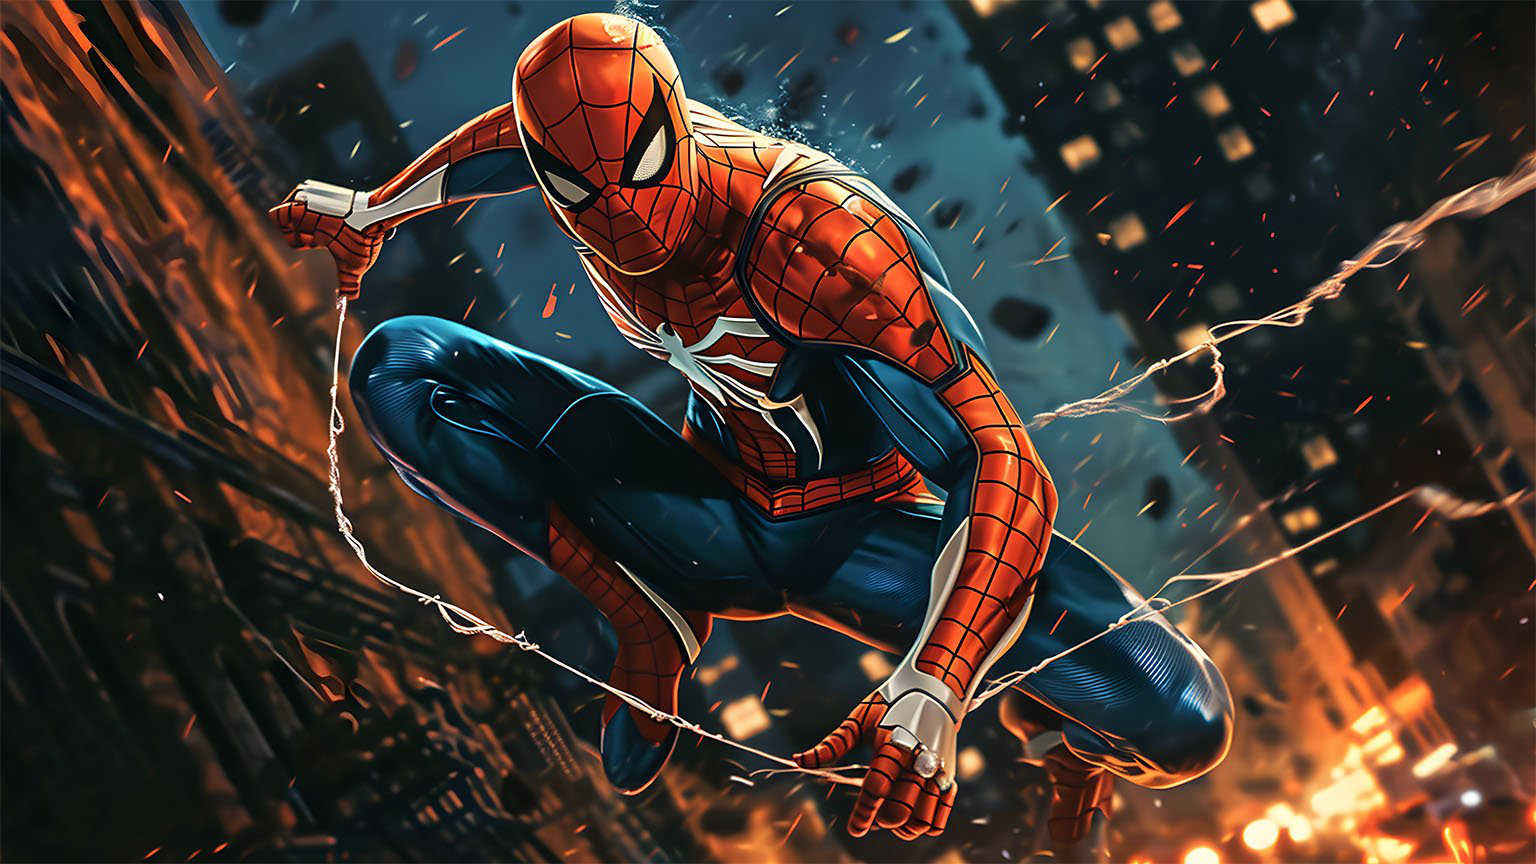

In [24]:
image

In [25]:
# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

In [26]:
# Generate caption
outputs = model.generate(**inputs)
caption = processor.decode(outputs[0], skip_special_tokens=True)
print(f"Generated Caption: {caption}")

Generated Caption: spiderman wallpaper spiderman wallpaper


# 2. OSCAR for Image Captioning

In [28]:
!pip install torchvision

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.6 MB 5.1 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.6 MB 4.9 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.6 MB 6.4 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.6 MB 6.0 MB/s eta 0:00:01
   ----------------------------------- ---- 1.4/1.6 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/203.0 MB 7.3 MB/s eta 0:00:28
   ---------------------------------------- 0.6/203.0 MB 7.6 MB/s eta 0:00:27
   ---------------------------------------- 1.0/203.0 MB 7.6 MB/s eta 0:00:27
   ---------------------------------------- 1.2/203.0 MB 7.7 MB/s eta 0:00:27
   ---------------------------------------- 1.6/203.0 MB 7.1 MB/s eta 0:00:29
   -----------

  You can safely remove it manually.


In [29]:
from transformers import BertTokenizer, EncoderDecoderModel
from PIL import Image
import torch
from torchvision.transforms import Compose, Resize, ToTensor, Normalize

RuntimeError: operator torchvision::nms does not exist

In [ ]:
# Load OSCAR tokenizer and model
tokenizer = BertTokenizer.from_pretrained("microsoft/oscar-base-vg")
model = EncoderDecoderModel.from_pretrained("microsoft/oscar-base-vg")

# Image preprocessing
transform = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load an image
image_path = "path_to_your_image.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
pixel_values = transform(image).unsqueeze(0)

# Prepare the input
inputs = {
    "pixel_values": pixel_values,
    "decoder_input_ids": torch.tensor([[tokenizer.cls_token_id]])
}

# Generate caption
outputs = model.generate(**inputs, max_length=20)
caption = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated Caption: {caption}")
